In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

# EDA 🧼🧹

In [2]:
# apertura del primer df

df_cfa = pd.read_csv("Customer Flight Activity.csv")
df_cfa.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
# validacion tamaño del df

df_cfa.shape

(405624, 10)

In [4]:
# validacion tipo de dato por columna mas info adicional

df_cfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [5]:
# comprobacion porcentage de nulos

df_cfa.isna().sum()/df_cfa.shape[0]*100

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [6]:
df_cfa.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [7]:
# comprobacion de duplicados

df_cfa.duplicated().sum()

np.int64(1864)

In [8]:
# comprobacion de duplicados usando la col Loyalty Number

df_cfa[df_cfa["Loyalty Number"].duplicated()].sort_values("Loyalty Number").head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
287317,100018,2018,6,0,0,0,0,0.0,0,0
388723,100018,2018,12,17,6,23,4945,494.0,0,0
257159,100018,2018,3,7,0,7,1876,280.5,0,0
257382,100018,2018,2,6,0,6,1824,273.0,0,0
142774,100018,2017,8,10,5,15,4200,420.0,690,56


In [9]:
df_cfa[df_cfa.duplicated(subset="Loyalty Number", keep=False)].sort_values("Loyalty Number")

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
388723,100018,2018,12,17,6,23,4945,494.0,0,0
185911,100018,2017,12,6,0,6,1908,190.0,0,0
101406,100018,2017,7,10,0,10,3870,387.0,0,0
287317,100018,2018,6,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
304217,999986,2018,6,0,0,0,0,0.0,0,0
321118,999986,2018,7,15,0,15,1995,199.0,0,0
354920,999986,2018,9,0,0,0,0,0.0,0,0
185910,999986,2017,11,0,0,0,0,0.0,0,0


In [10]:
df_cfa["Loyalty Number"].nunique()

16737

nota:  a este punto ya he visto que hay duplicados en la columna Loyalty Number y que la razón de ello es porque el mismo cliente puede viajar en diferentes meses en el año

In [11]:
# apertura segundo  df

df_clh = pd.read_csv("Customer Loyalty History.csv")
df_clh.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [12]:
df_clh.shape

(16737, 16)

In [13]:
df_clh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [14]:
# comprobacion porcentage de nulos

df_clh.isna().sum()/df_clh.shape[0]*100

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

nota: empiezo a darme cuenta de la cantidad nulos a tener una idea de por donde comenzar a explorar mas en ello. Tambien veo si hay columnas que no aportan valor 

In [15]:
df_clh.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [16]:
df_clh.describe(include=object).T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [17]:
# valido cantidad de duplicados en este df

df_clh.duplicated().sum()

np.int64(0)

In [18]:
# antes de hacer imputacion o modificación, hago un left merge porque no quiero perder las filas que comparten mismo Loyalty Number

df_merged = df_cfa.merge(df_clh, on="Loyalty Number", how="left")
df_merged.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [19]:
# corroboro % de nulos 

df_merged.isna().sum()/df_merged.shape[0]*100

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

In [20]:
# corroboro tamaño de nuevo df

df_merged.shape

(405624, 25)

In [21]:
# exploro columna Salary que tiene 25% de nulos 

df_merged["Salary"].describe()

count    302952.000000
mean      79268.825953
std       34992.133508
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88612.000000
max      407228.000000
Name: Salary, dtype: float64

In [22]:
# convierto lo numeros negativos a positivos porque puede ser un error

df_merged["Salary"]= df_merged["Salary"].abs()

In [23]:
# confirmo 

df_merged["Salary"].describe()

count    302952.000000
mean      79381.440228
std       34735.904533
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88612.000000
max      407228.000000
Name: Salary, dtype: float64

nota: he transformado negativos a positivos pero sigo sin saber si los nulos en Salaty coinciden con otro dato

In [24]:
df_merged.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
327145,423272,2018,8,0,0,0,0,0.00,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Doctor,135236.0,Married,Star,2631.88,Standard,2012,10,NaN,NaN
15953,570784,2018,10,14,2,16,3504,350.00,335,27,Canada,Nova Scotia,Halifax,B3C 2M8,Male,Bachelor,90521.0,Single,Aurora,6245.44,Standard,2015,4,NaN,NaN
161954,622801,2017,10,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P5S 6R4,Female,Bachelor,61813.0,Married,Nova,12731.95,Standard,2013,12,2014.0,8.0
261481,525246,2018,4,0,0,0,0,0.00,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,College,NaN,Single,Star,9602.08,Standard,2016,11,NaN,NaN
237094,126181,2018,3,0,0,0,0,0.00,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,84929.0,Married,Nova,3417.95,Standard,2014,4,2016.0,7.0
138708,287224,2017,9,0,0,0,0,0.00,0,0,Canada,Ontario,Trenton,K8V 4B2,Male,College,NaN,Single,Star,2273.62,Standard,2012,9,NaN,NaN
249973,107203,2018,4,10,0,10,2910,314.28,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Master,94014.0,Divorced,Star,3044.79,Standard,2016,3,NaN,NaN
298351,686555,2018,6,10,0,10,2650,265.00,0,0,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,87804.0,Married,Nova,5450.57,Standard,2013,4,NaN,NaN
216434,824414,2018,1,1,1,2,2236,223.00,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,96341.0,Married,Aurora,5738.28,Standard,2013,5,NaN,NaN
194985,582861,2017,12,0,0,0,0,0.00,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,95061.0,Married,Aurora,4984.62,Standard,2017,6,NaN,NaN


nota: en el print anterior se observa que al lado de la columna de Salaty, está Education y que la categía de educación que tiene salario nulo es College. Así que voy a verlo más de cerca

In [25]:
df_merged[["Education", "Salary"]]

,Education,Salary
0,Bachelor,92552.0
1,College,NaN
2,College,NaN
3,Bachelor,63253.0
4,Bachelor,91163.0
...,...,...
405619,College,NaN
405620,Doctor,217943.0
405621,Bachelor,47670.0
405622,College,NaN


In [26]:
df_merged[df_merged["Education"] == "College"][["Education", "Salary"]].nunique()


Education    1
Salary       0
dtype: int64

nota: he corroborado que la categría College dentro de la col Education es la que compagina con los nulos de la col Salary. Dado que College es una categoría dentro del análisis y es la que tiene todos los salarios nulos, de eliminar esta categría de df, me quedaría sin ella para al menos explicar que esta categoría también se ha analizado. Por lo tanto elijo crearme un nuevo df donde no aparezca esa categoría, en lugar de eliminarla del df original

In [27]:
# creo nuevo df sin la categoría College

df_sin_college = df_merged[df_merged["Education"] != "College"]


In [28]:
df_sin_college.isna().sum()/df_merged.shape[0]*100

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                          0.000000
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              65.469499
Cancellation Mon

nota: las columnas Cancellation Year y Cancellation Month tienen alto porcentage de nulos y me interesa indagar mas en ellas

In [29]:
df_sin_college.sample(20)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
273377,259342,2018,5,15,0,15,1365,136.00,0,0,Canada,Quebec,Montreal,H2Y 2W2,Male,Bachelor,54384.0,Married,Star,2668.66,Standard,2017,4,NaN,NaN
393874,375451,2018,12,2,2,4,3548,354.00,0,0,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,77046.0,Single,Nova,5294.28,Standard,2018,5,NaN,NaN
312103,519742,2018,7,0,0,0,0,0.00,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,63368.0,Married,Aurora,11982.42,Standard,2016,11,NaN,NaN
230781,204375,2018,3,10,2,12,1176,175.50,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,60758.0,Married,Aurora,6727.62,Standard,2014,10,NaN,NaN
26483,609971,2017,2,0,0,0,0,0.00,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,98314.0,Married,Star,6627.17,Standard,2016,9,NaN,NaN
226762,130368,2018,2,1,0,1,637,68.04,0,0,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,92859.0,Married,Star,4591.63,Standard,2013,10,NaN,NaN
88097,293137,2017,6,0,0,0,0,0.00,0,0,Canada,Ontario,Kingston,M9K 2P4,Male,Bachelor,68256.0,Married,Star,2589.43,Standard,2018,8,NaN,NaN
55990,382983,2017,4,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,87747.0,Married,Star,2701.49,Standard,2018,12,NaN,NaN
330143,580212,2018,8,0,0,0,0,0.00,0,0,Canada,Nova Scotia,Halifax,B3C 2M8,Male,Bachelor,94864.0,Divorced,Nova,10719.08,Standard,2012,5,NaN,NaN
213449,666417,2018,1,0,0,0,0,0.00,0,0,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,98417.0,Married,Nova,4881.39,Standard,2015,8,NaN,NaN


In [30]:
df_sin_college[["Cancellation Year", "Cancellation Month"]].value_counts()

Cancellation Year  Cancellation Month
2018.0             8.0                   1392
                   11.0                  1272
                   12.0                  1248
                   1.0                    984
                   10.0                   960
                                         ... 
2013.0             8.0                     72
                   7.0                     72
                   6.0                     72
                   4.0                     24
                   1.0                     24
Name: count, Length: 69, dtype: int64

nota: las columnas Cancellation Year y Cancellation Month no son relevante para el análisis que se está llevando a cabo y no parecen estar relacionadas con algun otro daot del df. Ello junto con el hecho de que ambas tienen 65% de nulos, elijo eliminar esas columnas ya que mi análisis no depende de ellas.

In [31]:
df_sin_college.drop(columns=['Cancellation Year', 'Cancellation Month'], inplace=True)
df_sin_college.sample(20)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
220054,724222,2018,4,3,1,4,288,35.0,0,0,Canada,Alberta,Calgary,T3E 2V9,Female,Bachelor,79727.0,Married,Nova,2799.75,Standard,2016,2
316110,732362,2018,7,5,0,5,2790,279.0,0,0,Canada,Ontario,Kingston,M9K 2P4,Female,Master,72558.0,Divorced,Star,4995.17,Standard,2012,9
211801,561981,2017,2,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H4G 3T4,Female,Bachelor,77696.0,Married,Nova,12590.94,Standard,2017,2
149145,839748,2017,9,12,2,14,2422,242.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,85128.0,Married,Star,2584.53,Standard,2016,4
275657,380255,2018,5,4,4,8,1840,184.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,High School or Below,46714.0,Single,Nova,6274.45,Standard,2016,8
97130,828924,2018,10,10,6,16,3344,334.0,451,37,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83497.0,Divorced,Nova,19393.21,Standard,2017,11
258162,126581,2018,2,6,0,6,1866,279.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,64046.0,Married,Aurora,10546.66,Standard,2015,6
173838,357903,2017,11,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Male,Bachelor,84838.0,Single,Nova,2762.80,Standard,2018,11
375901,319123,2018,11,7,2,9,927,92.0,0,0,Canada,Alberta,Edmonton,T3G 6Y6,Male,High School or Below,44942.0,Married,Nova,8970.65,Standard,2016,12
8500,553389,2017,1,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Master,109361.0,Divorced,Star,2397.04,Standard,2017,3


In [32]:
# compruebo porcentage de nulos nuevamente 

df_sin_college.isna().sum()/df_sin_college.shape[0]*100

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
Country                        0.0
Province                       0.0
City                           0.0
Postal Code                    0.0
Gender                         0.0
Education                      0.0
Salary                         0.0
Marital Status                 0.0
Loyalty Card                   0.0
CLV                            0.0
Enrollment Type                0.0
Enrollment Year                0.0
Enrollment Month               0.0
dtype: float64

In [33]:
#imprimo para ver si hay dato que quiera cambiar 

df_sin_college.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
dtype: object

# Visualización 📊📈

### 1. Distribucion de la cantidad de vuelos reservados por mes durante el año

In [34]:
# busco cuantos años son y los que deberían salir en la gráfica 

df_sin_college["Year"].unique()


array([2017, 2018])

In [35]:
# creo unavariable a partir de un group by para ver el numero de vuleos segun el mes y el año

reservas_por_mes = df_merged.groupby(["Year", "Month"])["Flights Booked"].sum()
reservas_por_mes

Year  Month
2017  1         47766
      2         47691
      3         64271
      4         55720
      5         65279
      6         80493
      7         89288
      8         78692
      9         63304
      10        60351
      11        56905
      12        77650
2018  1         49170
      2         48643
      3         66928
      4         56791
      5         76891
      6         92749
      7        104143
      8         90512
      9         73075
      10        69110
      11        65345
      12        88397
Name: Flights Booked, dtype: int64

In [36]:
# Creo una columna de 'Año-Mes' para el gráfico

reservas_por_mes = reservas_por_mes.reset_index()
reservas_por_mes["Año-Mes"] = reservas_por_mes["Year"].astype(str) + '-' + reservas_por_mes["Month"].astype(str).str.zfill(2)

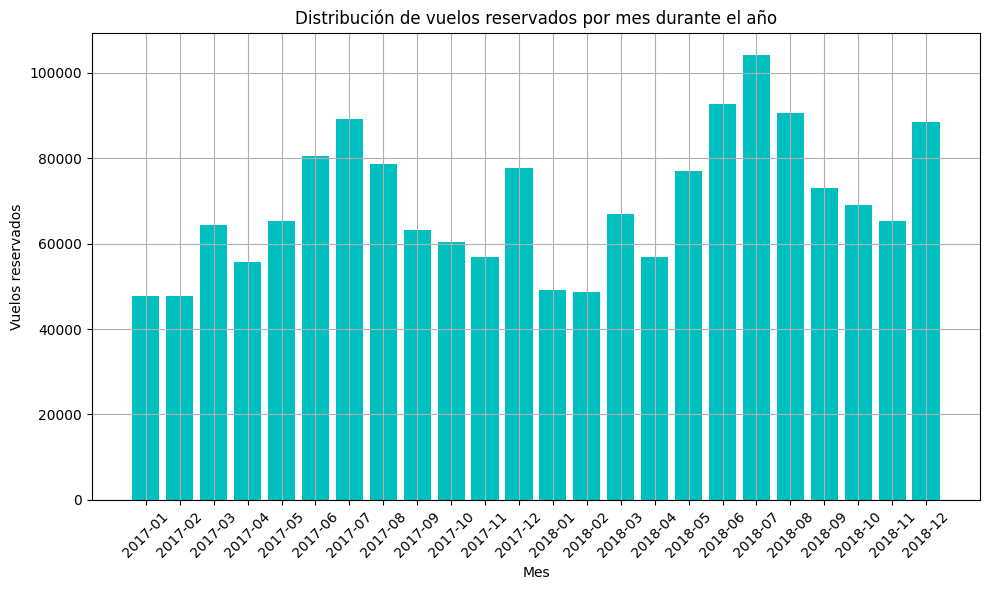

In [37]:
# Grafico el diagrama de barras

plt.figure(figsize=(10, 6))
plt.bar(reservas_por_mes["Año-Mes"], reservas_por_mes["Flights Booked"], color='c')
plt.title("Distribución de vuelos reservados por mes durante el año")
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

✅ nota: a partir de la gráfica anterior, se puede concluir quedurante julio de 2018 es cuando ocurrieron la mator cantidad de vuelos entre el período 2017-2018 

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumula dos por los cliente?

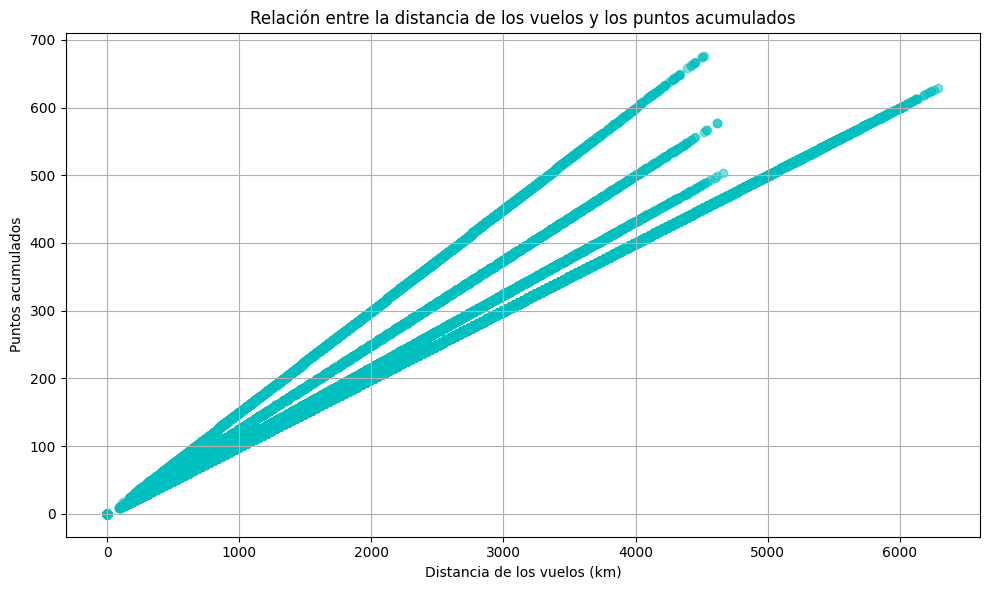

In [38]:
# Hago gráfico de dispersión 

plt.figure(figsize=(10, 6))
plt.scatter(df_sin_college["Distance"], df_sin_college["Points Accumulated"], color='c', alpha=0.5)
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados")
plt.xlabel("Distancia de los vuelos (km)")
plt.ylabel("Puntos acumulados")
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Cálculo del coeficiente de correlación de Pearson
correlacion = df_sin_college["Distance"].corr(df_sin_college["Points Accumulated"])

print(f"Coeficiente de correlación entre distancia y puntos acumulados: {correlacion}")

Coeficiente de correlación entre distancia y puntos acumulados: 0.9944715737881804


✅ nota: Como el coeficiente está cerca de +1, indica una relación positiva fuerte

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [40]:
# Agrupo por 'Province' para ver el número único de 'Loyalty Number' (clientes) por provincia

distribucion_provincia = df_sin_college.groupby("Province")["Loyalty Number"].nunique()
distribucion_provincia


Province
Alberta                  725
British Columbia        3274
Manitoba                 490
New Brunswick            490
Newfoundland             191
Nova Scotia              407
Ontario                 4017
Prince Edward Island      47
Quebec                  2476
Saskatchewan             303
Yukon                     79
Name: Loyalty Number, dtype: int64

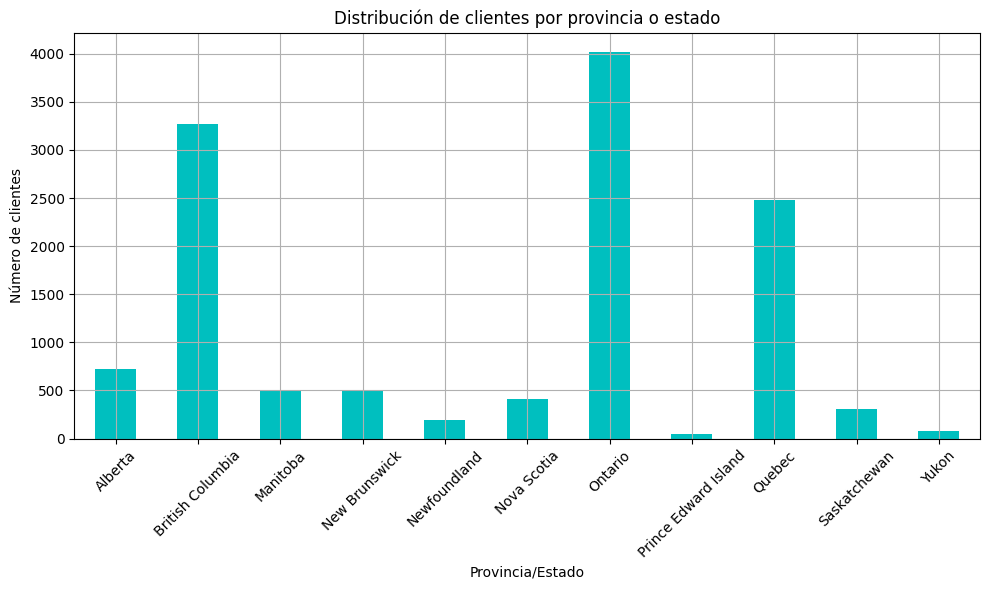

In [41]:
#  gráfico de barras para visualizar la distribución de clientes por provincia

plt.figure(figsize=(10, 6))
distribucion_provincia.plot(kind='bar', color='c')
plt.title("Distribución de clientes por provincia o estado")
plt.xlabel("Provincia/Estado")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


✅ nota: Ontario es la provincia con mayor numero de clientes

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
# saco el promeio de cada nivel de educación de la columna salario 

promedio = df_sin_college.groupby('Education')['Salary'].mean()

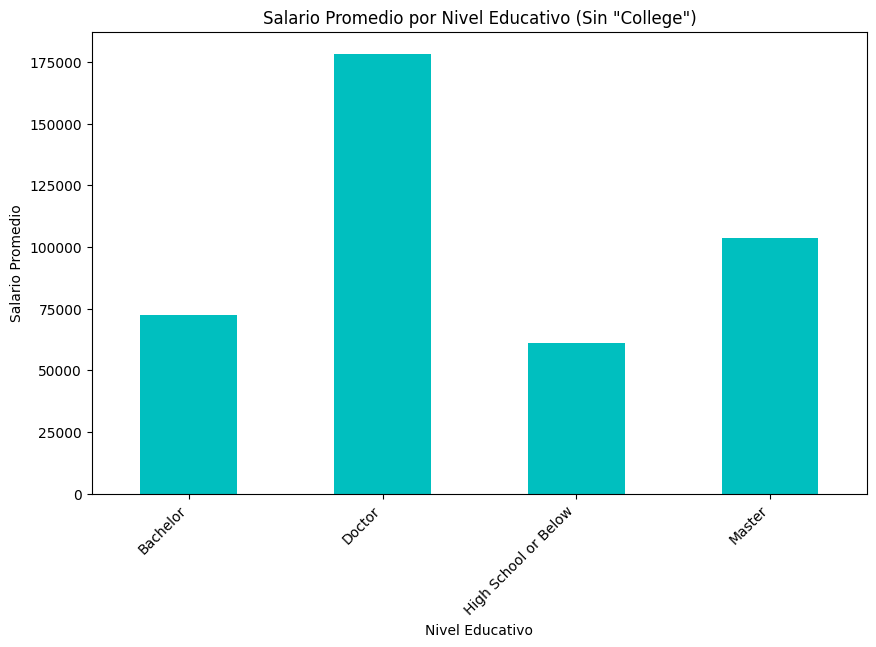

In [ ]:
# se grafica 

plt.figure(figsize=(10, 6))
promedio.plot(kind='bar', color='c')
plt.title('Salario Promedio por Nivel Educativo (Sin "College")')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [44]:
# saco y guardo los valores unicos de loyalty number

proporcion_tarjetas = df_sin_college.groupby('Loyalty Card')['Loyalty Number'].nunique()


In [45]:
# Convierto  a porcentaje

proporcion_tarjetas = (proporcion_tarjetas / proporcion_tarjetas.sum()) * 100
proporcion_tarjetas

Loyalty Card
Aurora    21.081687
Nova      34.714777
Star      44.203536
Name: Loyalty Number, dtype: float64

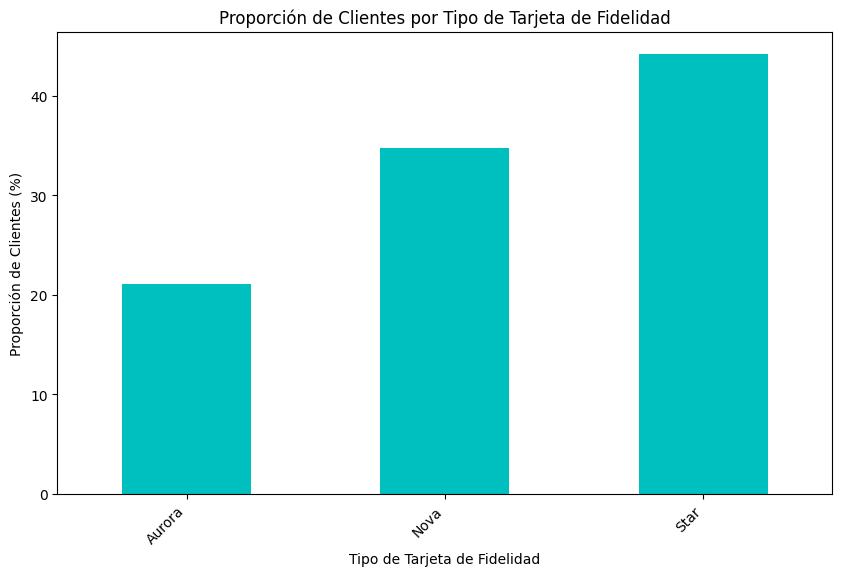

In [46]:
# hago grafica de barras para verlo

plt.figure(figsize=(10, 6))
proporcion_tarjetas.plot(kind='bar', color='c')
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.xlabel('Tipo de Tarjeta de Fidelidad')
plt.ylabel('Proporción de Clientes (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

✅ nota: La tarjeta de fidelidad Star tiene mayor porcentage de clientes

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [47]:
distribucion_estado_civil_genero = df_sin_college.groupby(['Gender', 'Marital Status'])['Loyalty Number'].nunique().reset_index()
distribucion_estado_civil_genero


,Gender,Marital Status,Loyalty Number
0,Female,Divorced,1081
1,Female,Married,4179
2,Female,Single,1066
3,Male,Divorced,1061
4,Male,Married,4120
5,Male,Single,992


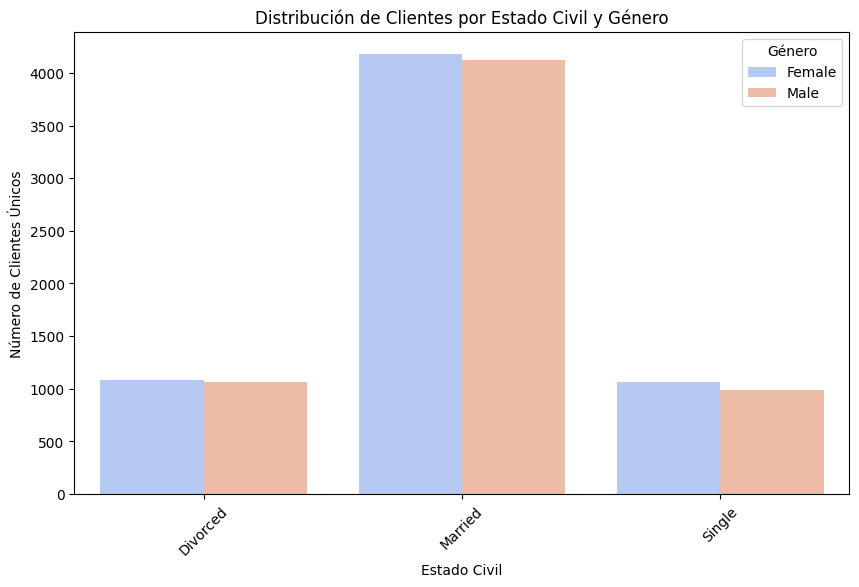

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Loyalty Number', hue='Gender', data=distribucion_estado_civil_genero, palette='coolwarm')
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes Únicos')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()

✅ nota: los hombres y mujeres casados representan la mayor cantidad de clientes